<a href="https://colab.research.google.com/github/ykedarinath/Task_6/blob/main/Guvi_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Predictor - Assignment 8

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [15]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1
Find the linear regression equation for mileage vs price.

Chart the original data and the equation on the chart.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [16]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [17]:
import math
df["Tr_Milage"] =[math.sin(i) for i in df["Mileage"]]

In [18]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Tr_Milage
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0.520959
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,-0.682689
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.966405
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,-0.535402
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0.767173


In [19]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Tr_Milage
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.063581
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,-0.022115
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,-0.010061
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,-0.026483
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.027462
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.007001
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.025446
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.010429
Tr_Milage,-0.063581,-0.022115,-0.010061,-0.026483,0.027462,0.007001,-0.025446,0.010429,1.000000


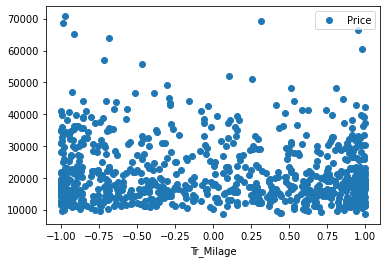

In [20]:
df.plot(x='Tr_Milage', y='Price', style='o')

plt.show()

In [22]:
X = df.iloc[:,1].values 
y = df.iloc[:, 0].values 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state = 5)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [26]:
y_predic = regressor.predict(X_test.reshape(-1,1))

In [27]:
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic})
df_1.head()

,Actual,Predicted
0,9506.047937,20599.345379
1,14429.789643,23467.989095
2,9919.048185,18374.471411
3,23249.841685,19613.589703
4,16927.779761,24029.210516


In [28]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_predic))

0.0118342527293549


# Tasks, Part 2

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Find the combination of the factors that is the best predictor for price.

In [29]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Tr_Milage
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0.520959
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,-0.682689
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0.966405
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,-0.535402
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0.767173


In [30]:
X1 = df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]] 
y1 = df["Price"]

In [31]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.45, random_state = 5)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [33]:
y1_predic = regressor.predict(X1_test)

In [34]:
df2 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_predic})
df2.head()

,Actual,Predicted
207,9506.047937,14306.294733
330,14429.789643,21155.170163
199,9919.048185,5656.860194
648,23249.841685,15859.219489
620,16927.779761,14244.353009


In [35]:
from sklearn import metrics
print(metrics.r2_score(y1_test,y1_predic))

0.4551489204217809


In [36]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Tr_Milage
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.063581
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,-0.022115
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,-0.010061
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,-0.026483
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.027462
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573,0.007001
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444,-0.025446
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000,0.010429
Tr_Milage,-0.063581,-0.022115,-0.010061,-0.026483,0.027462,0.007001,-0.025446,0.010429,1.000000


According to corelation values, we found that Cylinder,Litre and Cruise have good corealtion with Price


# Tasks, Hard Mode

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

Find the best combination of factors to predict price.

In [37]:
X2 = df[["Cylinder","Liter","Cruise","Leather"]] 
y2 = df["Price"]

In [38]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.215, random_state = 5)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression()

In [41]:
y2_predic = regressor.predict(X2_test)

In [42]:
from sklearn import metrics
print(metrics.r2_score(y2_test,y2_predic))

0.4614241785240121
